**DESPRE**: ML (Tabel) pentru TOATE VOCALELE din Evaluation.docx... Practic, încărcarea unui fișier csv (caracteristici MFDFA și Surfboard pentru audio în funcție de lungime: <2, >=2 și orice durata) Apoi creând 3 dataframes: unul cu doar MDFFA, unul numai Surfboard și unul combinat => Precizie, ROC

# **Installs**

In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


----Installs for FSM used for Relief feature selection.---------

In [ ]:
pip install skrebate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install bottleneck

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mifs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mifs (from versions: none)
ERROR: No matching distribution found for mifs


^^^^----------------------Installs for FSM used for Relief feature selection.----------------------^^^^

Installing surfboard...more info: https://surfboard.readthedocs.io/en/latest/installation.html

In [ ]:
pip install surfboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.48.0-1-cp38-cp38-manylinux2014_x86_64.whl (3.6 MB)
  Using cached llvmlite-0.31.0-cp38-cp38-manylinux1_x86_64.whl (20.2 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
    Uninstalling llvmlite-0.36.0:
      Successfully uninstalled llvmlite-0.36.0
  Attempting uninstall: numba
    Found existing installation: numba 0.53.0
    Uninstalling numba-0.53.0:
      Successfully uninstalled numba-0.53.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyrpde 0.1.3 requires numba>=0.49.1, but you have numba 0.48.0 which is incompatible.


In [ ]:
pip install numba==0.53.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.53.0-cp38-cp38-manylinux2014_x86_64.whl (3.4 MB)
  Using cached llvmlite-0.36.0-cp38-cp38-manylinux2010_x86_64.whl (25.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.31.0
    Uninstalling llvmlite-0.31.0:
      Successfully uninstalled llvmlite-0.31.0
  Attempting uninstall: numba
    Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
surfboard 0.2.0 requires numba==0.48.0, but you have numba 0.53.0 which is incompatible.


In [ ]:
pip install --ignore-installed llvmlite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached llvmlite-0.39.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.53.0 requires llvmlite<0.37,>=0.36.0rc1, but you have llvmlite 0.39.1 which is incompatible.


In [ ]:
pip install pyrpde

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached llvmlite-0.36.0-cp38-cp38-manylinux2010_x86_64.whl (25.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1


In [ ]:
pip install praat-parselmouth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Imports**

In [ ]:
from surfboard.sound import Waveform
from surfboard.feature_extraction import extract_features
import parselmouth
from parselmouth.praat import call
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import sklearn
import pathlib
import csv
import os
import math
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit




from sklearn.model_selection import train_test_split

Importing libraries for FSM (Relief).

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/python scripts/FSM-main')
sys.path.append('/content/drive/MyDrive/python scripts/mifs-master')
sys.path.append('/content/drive/MyDrive/python scripts/RRCT-main')
import sklearn.feature_selection._base
sys.modules['sklearn.feature_selection.base'] = sklearn.feature_selection._base


In [ ]:
from mrmr import mrmr_classif
from datetime import datetime
from multiprocessing import cpu_count



# CSV

First, mfdfa + surfboard but we need to perform feature selection bc there are too many. (I have 3 csv that I need to import: one for any length, one for <2 and one for >=2.)

In [ ]:
#audios of no condition
csv_file_test = 'features_mfdfa_and_surfboard.csv'
csv_file_train = 'features_more_2seconds_mfdfa_and_surfboard.csv'


# Creating the dataframes

Here I will create 3 separate dataframes from the csv file: one containing only MFDFA, one with Surfboard features and one with MFDFA + Surfboard.

In [ ]:
# Read in data and display first 5 rows
features_train = pd.read_csv(f'/content/drive/MyDrive/Parkinson CSV files/{csv_file_train}', index_col = 0)
features_train.head(5)
# Read in data and display first 5 rows
features_test = pd.read_csv(f'/content/drive/MyDrive/Parkinson CSV files/{csv_file_test}', index_col = 0)
features_test.head(5)

,filename,a_A,b_A,c_A,d_A,g_A,a_E,b_E,c_E,d_E,...,f2_U,f3_U,f4_U,hnr_U,LPC_0_U,LPC_1_U,LPC_2_U,LPC_3_U,LPC_4_U,label
0,AVPEPUDEAC0001a1.wav,0.005134,2.773804,14.464413,0.239951,0.438907,0.008326,2.786644,37.006651,0.358826,...,855.923600,2691.467349,3799.771303,25.690630,1.0,-1.621395,0.552271,-0.207879,0.282346,0
1,AVPEPUDEAC0001a2.wav,0.004287,2.786766,12.529315,0.228076,0.363295,0.008697,2.842495,33.157190,0.324737,...,773.168390,2650.082362,3589.815036,23.842138,1.0,-1.545521,0.431359,-0.192440,0.311552,0
2,AVPEPUDEAC0001a3.wav,0.003158,2.556353,14.310374,0.237569,0.358898,0.009720,3.256971,27.910551,0.321402,...,2802.277666,3767.566577,5145.967325,31.139092,1.0,-2.009604,1.339565,-0.627501,0.301435,0
3,AVPEPUDEAC0003a1.wav,-0.023849,1.425489,40.734144,0.501434,1.056339,0.002281,2.183830,37.554326,0.604607,...,2192.993042,3346.745084,5069.993537,16.921561,1.0,-1.657522,0.385750,0.235394,0.039457,0
4,AVPEPUDEAC0003a3.wav,-0.005259,1.808647,44.468063,0.677819,1.073030,0.002380,2.212522,40.705040,0.588844,...,2181.058987,3110.540368,5115.181137,9.182765,1.0,-1.827665,0.620723,0.272772,-0.063501,0


In [ ]:
features_train.shape

(115, 237)

In [ ]:
features_test.shape

(300, 237)

In [ ]:
labels_train = np.array(features_train['label'])
labels_test = np.array(features_test['label'])

## MFDFA only dataframe

In [ ]:
features_mfdfa_train = features_train[['a_A','b_A','c_A','d_A','g_A','a_E','b_E','c_E','d_E','g_E','a_I','b_I','c_I','d_I','g_I','a_O','b_O','c_O','d_O','g_O','a_U','b_U','c_U','d_U','g_U']]
features_mfdfa_test = features_test[['a_A','b_A','c_A','d_A','g_A','a_E','b_E','c_E','d_E','g_E','a_I','b_I','c_I','d_I','g_I','a_O','b_O','c_O','d_O','g_O','a_U','b_U','c_U','d_U','g_U']]


In [ ]:
features_mfdfa_train.shape

(115, 25)

In [ ]:
features_mfdfa_test.shape

(300, 25)

In [ ]:
# Convert to numpy array
features_mfdfa_train = np.array(features_mfdfa_train)
features_mfdfa_test = np.array(features_mfdfa_test)

## Surfboard only dataframe

### Feature ranking

In [ ]:
#import libraries
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [ ]:
# Load Data
data = pd.read_csv(f'/content/drive/MyDrive/Parkinson CSV files/{csv_file}',index_col=0)
X = data.drop(['filename','label','a_A','b_A','c_A','d_A','g_A','a_E','b_E','c_E','d_E','g_E','a_I','b_I','c_I','d_I','g_I','a_O','b_O','c_O','d_O','g_O','a_U','b_U','c_U','d_U','g_U'], axis = 1)
columns_list = list(X)
y = data['label']

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#Fit the model
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)

  #Selected features
selected_features = X.columns[rfecv.get_support()]


### Surfboard Features

In [ ]:
features_surfboard_train = features_train[['mfcc_mean_1_A', 'mfcc_mean_2_A', 'mfcc_mean_4_A', 'mfcc_mean_9_A',
       'mfcc_mean_10_A', 'mfcc_mean_12_A', 'mfcc_mean_13_A',
       'loudness_slidingwindow_mean_A', 'hnr_A', 'LPC_2_A', 'LPC_3_A',
       'mfcc_mean_1_E', 'mfcc_mean_3_E', 'mfcc_mean_5_E', 'mfcc_mean_6_E',
       'mfcc_mean_7_E', 'mfcc_mean_10_E', 'mfcc_mean_11_E', 'mfcc_mean_12_E',
       'mfcc_mean_13_E', 'f0_contour_mean_E', 'f0_mean_E', 'hnr_E', 'LPC_2_E',
       'LPC_3_E', 'mfcc_mean_1_I', 'mfcc_mean_3_I', 'mfcc_mean_5_I',
       'mfcc_mean_6_I', 'mfcc_mean_7_I', 'mfcc_mean_9_I', 'mfcc_mean_11_I',
       'mfcc_mean_12_I', 'mfcc_mean_13_I', 'f0_contour_mean_I', 'hnr_I',
       'LPC_2_I', 'LPC_3_I', 'LPC_4_I', 'mfcc_mean_3_O', 'mfcc_mean_4_O',
       'mfcc_mean_6_O', 'mfcc_mean_8_O', 'mfcc_mean_9_O', 'mfcc_mean_13_O',
       'f0_contour_mean_O', 'f0_std_O', 'log_energy_O',
       'loudness_slidingwindow_mean_O', 'mfcc_mean_2_U', 'mfcc_mean_3_U',
       'mfcc_mean_5_U', 'mfcc_mean_6_U', 'mfcc_mean_7_U', 'mfcc_mean_8_U',
       'mfcc_mean_10_U', 'mfcc_mean_11_U', 'hnr_U']]


features_surfboard_test = features_test[['mfcc_mean_1_A', 'mfcc_mean_2_A', 'mfcc_mean_4_A', 'mfcc_mean_9_A',
       'mfcc_mean_10_A', 'mfcc_mean_12_A', 'mfcc_mean_13_A',
       'loudness_slidingwindow_mean_A', 'hnr_A', 'LPC_2_A', 'LPC_3_A',
       'mfcc_mean_1_E', 'mfcc_mean_3_E', 'mfcc_mean_5_E', 'mfcc_mean_6_E',
       'mfcc_mean_7_E', 'mfcc_mean_10_E', 'mfcc_mean_11_E', 'mfcc_mean_12_E',
       'mfcc_mean_13_E', 'f0_contour_mean_E', 'f0_mean_E', 'hnr_E', 'LPC_2_E',
       'LPC_3_E', 'mfcc_mean_1_I', 'mfcc_mean_3_I', 'mfcc_mean_5_I',
       'mfcc_mean_6_I', 'mfcc_mean_7_I', 'mfcc_mean_9_I', 'mfcc_mean_11_I',
       'mfcc_mean_12_I', 'mfcc_mean_13_I', 'f0_contour_mean_I', 'hnr_I',
       'LPC_2_I', 'LPC_3_I', 'LPC_4_I', 'mfcc_mean_3_O', 'mfcc_mean_4_O',
       'mfcc_mean_6_O', 'mfcc_mean_8_O', 'mfcc_mean_9_O', 'mfcc_mean_13_O',
       'f0_contour_mean_O', 'f0_std_O', 'log_energy_O',
       'loudness_slidingwindow_mean_O', 'mfcc_mean_2_U', 'mfcc_mean_3_U',
       'mfcc_mean_5_U', 'mfcc_mean_6_U', 'mfcc_mean_7_U', 'mfcc_mean_8_U',
       'mfcc_mean_10_U', 'mfcc_mean_11_U', 'hnr_U']]


In [ ]:
features_surfboard_train.shape

(115, 58)

In [ ]:
features_surfboard_test.shape

(300, 58)

In [ ]:
# Convert to numpy array
features_surfboard_train = np.array(features_surfboard_train)
features_surfboard_test = np.array(features_surfboard_test)

## MFDFA + Surfboard dataframe

In [ ]:
features_mfdfa_surfboard_train = features_train[['a_A','b_A','c_A','d_A','g_A','a_E','b_E','c_E','d_E','g_E','a_I','b_I','c_I','d_I','g_I','a_O','b_O','c_O','d_O','g_O','a_U','b_U','c_U','d_U','g_U',
                                     'mfcc_mean_1_A', 'mfcc_mean_2_A', 'mfcc_mean_4_A', 'mfcc_mean_9_A',
       'mfcc_mean_10_A', 'mfcc_mean_12_A', 'mfcc_mean_13_A',
       'loudness_slidingwindow_mean_A', 'hnr_A', 'LPC_2_A', 'LPC_3_A',
       'mfcc_mean_1_E', 'mfcc_mean_3_E', 'mfcc_mean_5_E', 'mfcc_mean_6_E',
       'mfcc_mean_7_E', 'mfcc_mean_10_E', 'mfcc_mean_11_E', 'mfcc_mean_12_E',
       'mfcc_mean_13_E', 'f0_contour_mean_E', 'f0_mean_E', 'hnr_E', 'LPC_2_E',
       'LPC_3_E', 'mfcc_mean_1_I', 'mfcc_mean_3_I', 'mfcc_mean_5_I',
       'mfcc_mean_6_I', 'mfcc_mean_7_I', 'mfcc_mean_9_I', 'mfcc_mean_11_I',
       'mfcc_mean_12_I', 'mfcc_mean_13_I', 'f0_contour_mean_I', 'hnr_I',
       'LPC_2_I', 'LPC_3_I', 'LPC_4_I', 'mfcc_mean_3_O', 'mfcc_mean_4_O',
       'mfcc_mean_6_O', 'mfcc_mean_8_O', 'mfcc_mean_9_O', 'mfcc_mean_13_O',
       'f0_contour_mean_O', 'f0_std_O', 'log_energy_O',
       'loudness_slidingwindow_mean_O', 'mfcc_mean_2_U', 'mfcc_mean_3_U',
       'mfcc_mean_5_U', 'mfcc_mean_6_U', 'mfcc_mean_7_U', 'mfcc_mean_8_U',
       'mfcc_mean_10_U', 'mfcc_mean_11_U', 'hnr_U']]


features_mfdfa_surfboard_test = features_test[['a_A','b_A','c_A','d_A','g_A','a_E','b_E','c_E','d_E','g_E','a_I','b_I','c_I','d_I','g_I','a_O','b_O','c_O','d_O','g_O','a_U','b_U','c_U','d_U','g_U',
                                     'mfcc_mean_1_A', 'mfcc_mean_2_A', 'mfcc_mean_4_A', 'mfcc_mean_9_A',
       'mfcc_mean_10_A', 'mfcc_mean_12_A', 'mfcc_mean_13_A',
       'loudness_slidingwindow_mean_A', 'hnr_A', 'LPC_2_A', 'LPC_3_A',
       'mfcc_mean_1_E', 'mfcc_mean_3_E', 'mfcc_mean_5_E', 'mfcc_mean_6_E',
       'mfcc_mean_7_E', 'mfcc_mean_10_E', 'mfcc_mean_11_E', 'mfcc_mean_12_E',
       'mfcc_mean_13_E', 'f0_contour_mean_E', 'f0_mean_E', 'hnr_E', 'LPC_2_E',
       'LPC_3_E', 'mfcc_mean_1_I', 'mfcc_mean_3_I', 'mfcc_mean_5_I',
       'mfcc_mean_6_I', 'mfcc_mean_7_I', 'mfcc_mean_9_I', 'mfcc_mean_11_I',
       'mfcc_mean_12_I', 'mfcc_mean_13_I', 'f0_contour_mean_I', 'hnr_I',
       'LPC_2_I', 'LPC_3_I', 'LPC_4_I', 'mfcc_mean_3_O', 'mfcc_mean_4_O',
       'mfcc_mean_6_O', 'mfcc_mean_8_O', 'mfcc_mean_9_O', 'mfcc_mean_13_O',
       'f0_contour_mean_O', 'f0_std_O', 'log_energy_O',
       'loudness_slidingwindow_mean_O', 'mfcc_mean_2_U', 'mfcc_mean_3_U',
       'mfcc_mean_5_U', 'mfcc_mean_6_U', 'mfcc_mean_7_U', 'mfcc_mean_8_U',
       'mfcc_mean_10_U', 'mfcc_mean_11_U', 'hnr_U']]


In [ ]:
features_mfdfa_surfboard_train.shape

(115, 83)

In [ ]:
features_mfdfa_surfboard_test.shape

(300, 83)

In [ ]:
# Convert to numpy array
features_mfdfa_surfboard_train = np.array(features_mfdfa_surfboard_train)
features_mfdfa_surfboard_test = np.array(features_mfdfa_surfboard_test)

# TabPFN

## Install and imports

**In order to get the fastest predictions you need to enable GPUs for the notebook:**
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down
(https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=oM_8ELnJq_wd)

In [ ]:
!pip install tabpfn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd
import torch
import os
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pathlib import Path

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics


from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay


## Model - MFDFA

In [ ]:
X_train = features_mfdfa_train
y_train = labels_train

X_test = features_mfdfa_test
y_test = labels_test

In [ ]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by #features * #classes
# more ensemble members are slower, but more accurate
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [ ]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

Prediction time:  0.14830517768859863 Accuracy 0.7866666666666666


In [ ]:
# print(file, type(file))
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,prediction
0,0.0051339063182085,2.7738037206208315,14.464413420127338,0.2399512015481245,0.4389066457275611,0.008326330680683,2.786644264752733,37.006651090859854,0.3588256119855666,1.1736816512787034,...,2.5940776478881014,40.986575432093744,0.403692298977819,1.548062832263803,0.0010323674941697,2.1694254158734734,55.56837139940712,0.3304438742925414,1.378343593417244,0 (p=0.64)
1,0.0042865757355585,2.786765988541607,12.529315421786071,0.2280757652208558,0.3632952362760365,0.0086973233243499,2.842494586749147,33.15719032292519,0.3247367458901946,0.7249268580668224,...,2.989899239348805,26.7580614020025,0.3602786825884123,0.6154485266486779,0.0018732171103747,2.2488211139095555,53.70978836198696,0.321121098950478,1.117390283076111,0 (p=0.55)
2,0.0031579277459704,2.556352956590609,14.31037386446546,0.2375687305027609,0.3588977022172109,0.0097200433468615,3.256970977240187,27.910551383721195,0.3214022254659098,0.5666550565317904,...,2.8490947649803933,29.995854717969404,0.4191361585730248,0.8038912594018431,0.0019170457397734,1.870073560496076,5973.67050385211,0.7454539976272172,4891.938249474916,1 (p=0.68)
3,-0.0238486321365433,1.4254890800702087,40.73414359955652,0.5014338228891176,1.0563394486235165,0.0022808094627887,2.183829607158228,37.55432589245017,0.6046065114841584,0.7545688881613525,...,2.0277784930721365,41.42219866050016,0.4466406317013816,0.8300249983850402,0.0010051675139213,2.140443856450412,63.683380490029045,0.4365364572791953,1.0861341625728662,0 (p=0.94)
4,-0.0052588526981833,1.808646560829982,44.46806305491359,0.6778194164535868,1.073029812928206,0.0023802789797951,2.21252239656022,40.70503972277128,0.588844166304823,0.7603422249057855,...,1.972105934048677,45.42687709240139,0.6041036771946583,0.8996400679672838,0.0045524064862288,2.416168464194468,52.686013256186,0.6316567182598537,0.8538186272502247,0 (p=0.88)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.0029182776900182,1.3111637899124913,48384.99862708844,0.2760008641473552,3880.280787451253,-0.0037171109020383,1.725846031413468,41.72048616340959,0.3149352974361368,0.988546825178337,...,3.1285904684551493,22.981169835203257,0.4658920341555708,0.5239357426673756,0.0097137782312078,2.750495850981083,37.52523775024937,0.5510337097742756,1.1023256833601764,1 (p=0.95)
296,-0.0158261110808473,1.0348272457362402,158740.6742416085,0.3059594480259727,2476.3215919937315,0.0106789514189235,2.6154918529332223,30.762971631202596,0.4293026083875133,0.6987544736283141,...,3.1601948926223207,22.913558470691036,0.4732132900484105,0.5244918354529156,0.0095497880585586,2.6590030167192475,42.74075428573993,0.5838464391498801,1.4363698146729242,1 (p=0.75)
297,0.0028029016579502,2.433086662739628,37.87305476506516,0.0896654921860025,0.4385585033339665,0.0016964830908982,2.468749088961022,47.364169114455855,0.0927837375101495,0.7323325995479325,...,1.81739174307702,79.29522998387779,0.1190115100990014,1.597768696141041,0.0004561887759339,2.1942680515648454,58.06183247926765,0.1166997741564144,1.0338641150870294,1 (p=0.88)
298,0.0003623591024375,1.6353354253876269,426.6298879774566,0.1186579161569794,13.395817767513162,0.0004099466245648,1.95650451943331,96.4850042965493,0.1261032274494163,1.8457962012307816,...,2.678408436793479,29.03109509474429,0.0740921766999159,0.5339213376869947,0.0011210907307358,2.6678117288347183,36.74677829242956,0.0871639389762495,0.6457397309874021,1 (p=0.93)


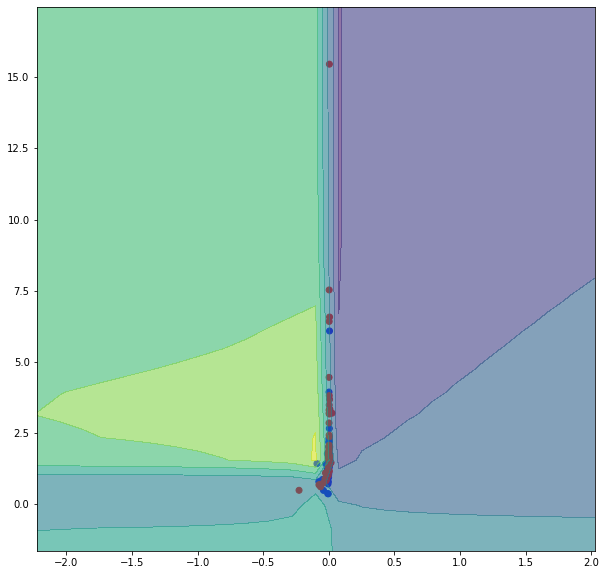

In [ ]:
# PLOTTING
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot the training points
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)

ROC Curve

In [ ]:
fpr_mfdfa, tpr_mfdfa, _ = metrics.roc_curve(y_eval,  p_eval)




## Model - SURFBOARD

In [ ]:
X_train = features_surfboard_train
y_train = labels_train

X_test = features_surfboard_test
y_test = labels_test

In [ ]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by #features * #classes
# more ensemble members are slower, but more accurate
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [ ]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

Prediction time:  0.3167729377746582 Accuracy 0.8433333333333334


In [ ]:
# print(file, type(file))
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,prediction
0,-372.61896,170.53824,-27.997536,-2.7577977,-17.110922,7.694843,-2.5611436,-26.97075265934598,22.314400093855983,1.4725984,...,138.99689,63.262894,1.0161364,-12.90854,-28.236895,-1.9515796,-8.7532625,-5.9020214,25.69062954071532,1 (p=0.62)
1,-394.3889,165.66505,-20.874956,1.7165015,-14.758257,5.7976418,-1.4570341,-26.52623791686028,19.567726129265388,1.4143746,...,145.3029,63.81268,4.0167556,-13.247813,-28.876928,-0.37581357,-13.794442,-9.085274,23.84213834844807,1 (p=0.88)
2,-399.75906,167.53125,-22.071875,10.703189,-22.815685,10.695197,-6.3392406,-27.59173374979032,19.65015138632784,1.2628361,...,152.82129,61.418854,3.2919927,-11.224258,-40.076305,-12.155783,-22.643847,-7.754123,31.139092350242336,1 (p=0.61)
3,-319.91913,231.11157,-21.140722,11.200557,7.5587273,6.5151987,-9.809328,-27.02354333670032,13.708716428039386,1.373818,...,197.65031,68.04728,22.730877,1.68572,-12.850858,-25.414022,14.432078,-5.155231,16.921560641452782,0 (p=0.92)
4,-335.42596,244.65614,-16.412966,-5.7742476,9.249897,-10.460424,-14.33936,-24.288309257374195,13.456280266271072,1.2222118,...,210.28244,62.47197,25.717434,-0.11636922,-9.6103115,-31.44106,16.505722,-13.440844,9.182764743242757,0 (p=0.97)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-405.6846,176.21242,-14.332948,-9.258759,-10.400782,12.971344,-0.27288505,-34.897389386536595,12.888005055731108,0.7262257,...,165.45892,23.40767,6.546531,-0.40073064,-23.561184,-10.592421,-30.542982,-19.785353,23.3672211679808,1 (p=0.97)
296,-399.94348,185.92459,-14.4737625,-4.9578276,-15.723853,6.05538,-0.2889898,-32.20949138725986,16.560675209000472,0.81717867,...,164.59648,25.796793,5.922304,-0.25786418,-25.64801,-11.110993,-31.377438,-20.265713,24.069607268674417,0 (p=0.56)
297,-493.19394,160.3716,-26.158154,12.035554,-7.5494676,15.630843,-14.410075,-43.97928041384559,15.174332433738009,1.0446548,...,138.0894,43.482773,19.198608,-6.339644,-25.324394,-8.972882,-5.006924,-2.3719783,24.66133988433528,1 (p=0.97)
298,-502.59683,151.51036,-7.863246,9.201672,8.20284,-0.2853807,0.0011345921,-42.938126543107366,17.28111398641738,1.0176905,...,135.70375,41.050583,18.42277,-7.425008,-30.389822,-15.904258,-7.9958553,-7.97734,23.17954273364443,1 (p=0.96)


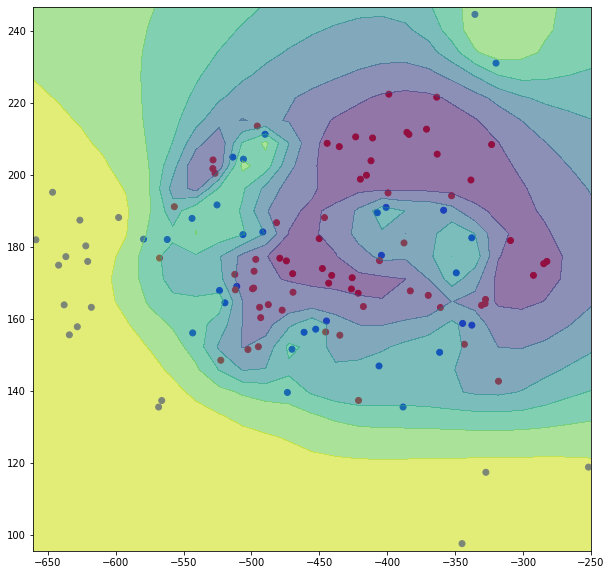

In [ ]:
# PLOTTING
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot the training points
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)

ROC Curve

In [ ]:
fpr_surfboard, tpr_surfboard, _ = metrics.roc_curve(y_eval,  p_eval)



## Model - MFDFA + SURFBOARD

In [ ]:
X_train = features_mfdfa_surfboard_train
y_train = labels_train

X_test = features_mfdfa_surfboard_test
y_test = labels_test

In [ ]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by #features * #classes
# more ensemble members are slower, but more accurate
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [ ]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

Prediction time:  0.5134532451629639 Accuracy 0.84


In [ ]:
# print(file, type(file))
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,prediction
0,0.0051339063182085,2.7738037206208315,14.464413420127338,0.2399512015481245,0.4389066457275611,0.008326330680683,2.786644264752733,37.006651090859854,0.3588256119855666,1.1736816512787034,...,138.99689,63.262894,1.0161364,-12.90854,-28.236895,-1.9515796,-8.7532625,-5.9020214,25.69062954071532,1 (p=0.51)
1,0.0042865757355585,2.786765988541607,12.529315421786071,0.2280757652208558,0.3632952362760365,0.0086973233243499,2.842494586749147,33.15719032292519,0.3247367458901946,0.7249268580668224,...,145.3029,63.81268,4.0167556,-13.247813,-28.876928,-0.37581357,-13.794442,-9.085274,23.84213834844807,1 (p=0.84)
2,0.0031579277459704,2.556352956590609,14.31037386446546,0.2375687305027609,0.3588977022172109,0.0097200433468615,3.256970977240187,27.910551383721195,0.3214022254659098,0.5666550565317904,...,152.82129,61.418854,3.2919927,-11.224258,-40.076305,-12.155783,-22.643847,-7.754123,31.139092350242336,1 (p=0.65)
3,-0.0238486321365433,1.4254890800702087,40.73414359955652,0.5014338228891176,1.0563394486235165,0.0022808094627887,2.183829607158228,37.55432589245017,0.6046065114841584,0.7545688881613525,...,197.65031,68.04728,22.730877,1.68572,-12.850858,-25.414022,14.432078,-5.155231,16.921560641452782,0 (p=0.94)
4,-0.0052588526981833,1.808646560829982,44.46806305491359,0.6778194164535868,1.073029812928206,0.0023802789797951,2.21252239656022,40.70503972277128,0.588844166304823,0.7603422249057855,...,210.28244,62.47197,25.717434,-0.11636922,-9.6103115,-31.44106,16.505722,-13.440844,9.182764743242757,0 (p=0.98)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.0029182776900182,1.3111637899124913,48384.99862708844,0.2760008641473552,3880.280787451253,-0.0037171109020383,1.725846031413468,41.72048616340959,0.3149352974361368,0.988546825178337,...,165.45892,23.40767,6.546531,-0.40073064,-23.561184,-10.592421,-30.542982,-19.785353,23.3672211679808,1 (p=0.96)
296,-0.0158261110808473,1.0348272457362402,158740.6742416085,0.3059594480259727,2476.3215919937315,0.0106789514189235,2.6154918529332223,30.762971631202596,0.4293026083875133,0.6987544736283141,...,164.59648,25.796793,5.922304,-0.25786418,-25.64801,-11.110993,-31.377438,-20.265713,24.069607268674417,0 (p=0.64)
297,0.0028029016579502,2.433086662739628,37.87305476506516,0.0896654921860025,0.4385585033339665,0.0016964830908982,2.468749088961022,47.364169114455855,0.0927837375101495,0.7323325995479325,...,138.0894,43.482773,19.198608,-6.339644,-25.324394,-8.972882,-5.006924,-2.3719783,24.66133988433528,1 (p=0.97)
298,0.0003623591024375,1.6353354253876269,426.6298879774566,0.1186579161569794,13.395817767513162,0.0004099466245648,1.95650451943331,96.4850042965493,0.1261032274494163,1.8457962012307816,...,135.70375,41.050583,18.42277,-7.425008,-30.389822,-15.904258,-7.9958553,-7.97734,23.17954273364443,1 (p=0.94)


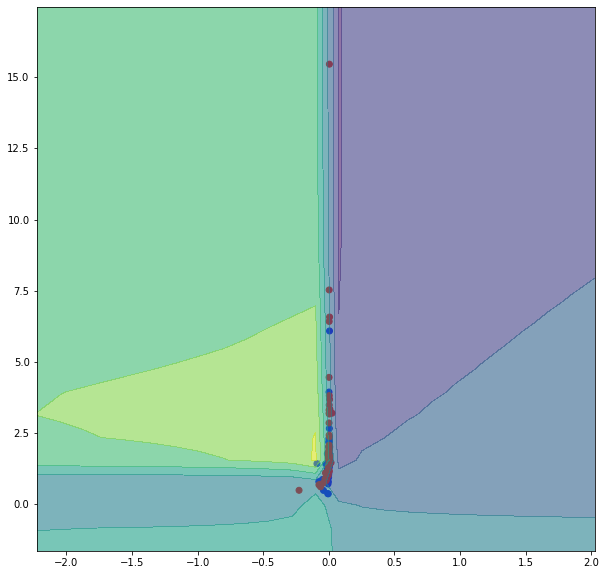

In [ ]:
# PLOTTING
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot the training points
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)

ROC Curve

In [ ]:
fpr_both, tpr_both, _ = metrics.roc_curve(y_eval,  p_eval)



## ROC

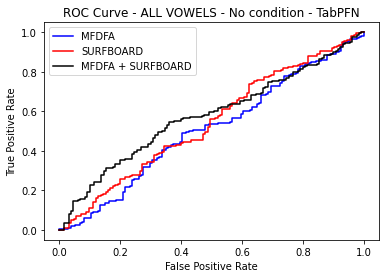

In [ ]:
plt.plot(fpr_mfdfa,tpr_mfdfa, color='blue',  label = 'MFDFA')
plt.plot(fpr_surfboard,tpr_surfboard, color='red',  label = 'SURFBOARD')
plt.plot(fpr_both,tpr_both, color='black',  label = 'MFDFA + SURFBOARD')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'ROC Curve - ALL VOWELS - No condition - TabPFN')
plt.savefig(f'/content/drive/MyDrive/Parkinson CSV files/ALL_Vowels_roc_ml_table_no_condition.png')
plt.legend()
plt.show()